# IMPORTING DATA

In this section we'll look mostly at importing data using various packages:

+ Scipy
+ Pandas
+ h5py

The packages we're using go beyond merely importing and exporting data

**TASKS:**

+ [Task 3.1](#task31) - Basic file import and export
+ [Task 3.2](#task32) - Pandas is amazing
+ [Task 3.3](#task33) - pcolor some sst data

In [8]:
%pylab inline
from pylab import *
import os, sys
import numpy as np
sys.path.append('D:\Dropbox\Scripts\SciPy4MAT')
# os.chdir('D:\Dropbox\Scripts\SciPy4MAT')
# from exercise_tools import print_sublists, avail_methods, obj

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Basic Importing 

First we'll see how to do a basic file import by iterating over the lines in a file. It is important to know that a file object is an iterable and that once you have iterated over an item, it moves onto the next. 

The data file we'll be working with is from the underway pCO<sub>2</sub> machine on the Agulhas. The data was collected on one of the Gough cruises. The file has a headerline and a footer. In the script below the header is extracted, and then the data

In [9]:
fid = open('../data/GO csir_247-0001dat.txt')

s = 'nelson\tmandela\nkgalema\tmothlante'.replace('\t', ' ')
print s

nelson mandela
kgalema mothlante


In [10]:
tab_name = '../data/GO csir_247-0001dat.txt'

with open(tab_name) as file_object:
    # with *** as ***: this opens the file and closes it once the loop exits
    print '#'*3, file_object, '#'*3
    
    # here we iterate over the header. 
    # This will not be repeated when we iterate over the rest of the file
    head = file_object.readline().split('\t') 
    
    data = []  # create an empty list
    for line in file_object:  # iterate over the lines in the file
        line = line.replace('\n','')
        line = line.split('\t')
        
        data.append(line)
        
print '\n', '#'*3, file_object, '#'*3

### <open file '../data/GO csir_247-0001dat.txt', mode 'r' at 0x10b9b3270> ###

### <closed file '../data/GO csir_247-0001dat.txt', mode 'r' at 0x10b9b3270> ###


<a name='task21'>**TASK 3.1:**</a>  If we want to work with the data you have to convert appropriate columns to `np.array`. Plot CO<sub>2</sub> against latitude 

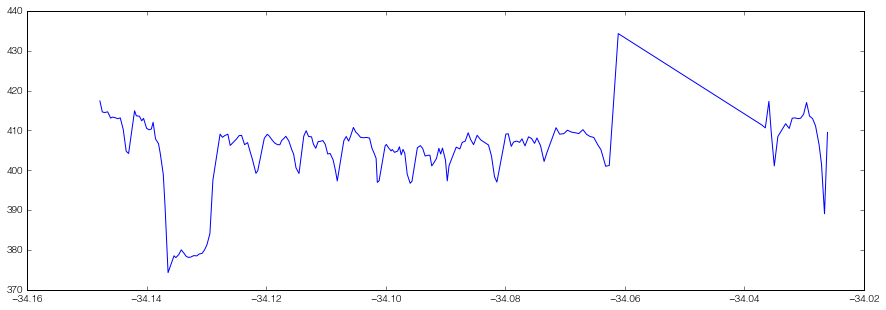

In [13]:
# YOUR CODE HERE

np_data = array(data[:-1])

ind = np_data[:,0] == 'EQU'
# np_data[:,0] represents the data type - we want only the EQU data

lat = np_data[ind,5].astype(float)  # the first index represents the data rows, the second the columns 
co2 = np_data[ind,10].astype(float)  # 5 is the latitude and 10 is the co2

figure(figsize=[15,5])
plot(lat, co2)
show()

### Pandas FTW

It may seem silly for me to give you the task above if Pandas is so amazing (See the script below)! But it's important this for when you want to import complex non uniform data and each line requires individual attention.

Pandas is amazing if you work with timeseries data and other 2D data. Once you've imported the file it can be used as a dictionary or a class object if the keys are valid. You can also plot a timeseries directly from the object. It's great for quickly checking what your data looks like. 

In [14]:
import pandas as pd

dat = pd.read_csv(tab_name, 
                  sep='\t',       # Tell pyhton that this file is tab seperated 
                  escapechar=' ', # There are random spaces in the header - this removes those
                  parse_dates={'DateTime': ['Date', 'PCTime']}, 
                  # with parse_dates, we tell the function to look at these columns to get these data. 
                  # Index_col tells the data by which column to reference the data. In this case,
                  # the new variable DateTime that we made
                  index_col='DateTime')
dat.Chconc[dat.Chconc == '-'] = np.NaN
dat.Chconc = dat.Chconc.astype(float)

/Users/luke/Development/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<a name=task32>**TASK 3.2:**</a> Plot temperature and chlorophyll on the same plot using pandas. You can use date as the x-axis

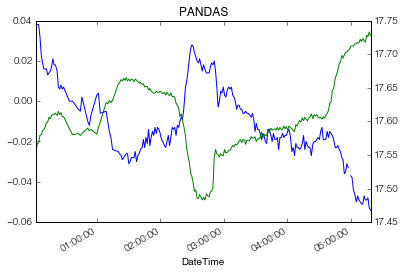

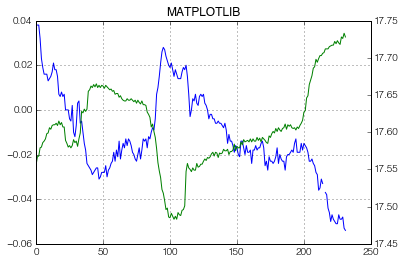

In [17]:
# YOUR CODE HERE

# THE PANDAS WAY
dat.Chconc = dat.Chconc.astype(float)
dat.Chconc.plot()
dat.temp.plot(secondary_y=True)
title('PANDAS')


# THE MATPLOTLIB WAY
figure()
plot(dat.Chconc)
grid(axis='both')

twinx()
plot(dat.temp,'g')
title('MATPLOTLIB')
show()

### NETCDF

Importing netCDF files is done using the `io` module that is part of scipy. In this module you will also find other functions to import MATLAB `.mat` files and `idl` files

In [18]:
from scipy import io  
# this module has to be explicitly imported and cannot be accessed by sp.io unless it is imported thus

nc_name = '../data/avhrr-only-v2.20030606.nc'

nco = io.netcdf_file(nc_name)
print 'netCDF oject:', nco

netCDF oject: <scipy.io.netcdf.netcdf_file object at 0x113ca7310>


The file object has several modules that you can access. File metadata is stored in the file and can be accessed using `nco.Description` 

In [19]:
print nco.filename
print nco.Description

../data/avhrr-only-v2.20030606.nc
Reynolds, et al.(2007) Daily High-resolution Blended Analyses. Available at ftp://eclipse.ncdc.noaa.gov/pub/OI-daily/daily-sst.pdf  Climatology is based on 1971-2000 OI.v2 SST, Satellite data: Navy NOAA17 NOAA18 AVHRR, Ice data: GSFC ice


To view the data first look at the dimensions of the data and then access the data in `nco.variables` which is stored as a `dict`

In [20]:
print nco.variables['sst'].dimensions
print nco.variables.keys()

('time', 'zlev', 'lat', 'lon')
['err', 'sst', 'lon', 'ice', 'anom', 'time', 'lat', 'zlev']


<a name=task33>**TASK 3.3:**</a> Extract only a southern African domain `[20S 40S, 10E 40E]` from the file for `sst` and `anom`. Plot the data using `pcolormesh`. Don't worry about mapping the data. We'll do that in the next lesson

/Users/luke/Development/Anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


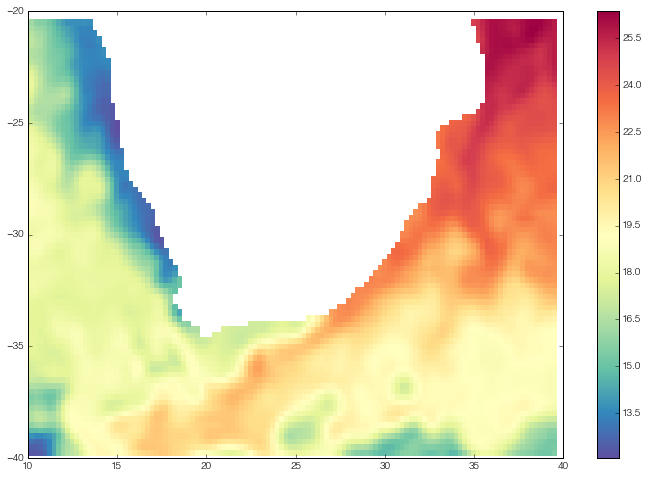

In [21]:
# YOUR CODE HERE

lat = nco.variables['lat'][:]
lon = nco.variables['lon'][:]

# find indicies of the variables we want
lat_0 = find(lat >= -40)[0]
lat_1 = find(lat <= -20)[-1]
lon_0 = find(lon >= 10)[0]
lon_1 = find(lon <= 40)[-1]

lat = lat[lat_0: lat_1]
lon = lon[lon_0: lon_1]

sst_obj = nco.variables['sst']  # making the distinguishment between the object and the data

sst = sst_obj[0,           # time dimension
              0,           # zlev dimension
              lat_0:lat_1, # latitudes 
              lon_0:lon_1] # longitudes

# multiplying the scale factor and masking the land values
# masked values are not plotted, similar to NaNs
sst = ma.masked_less(sst * sst_obj.scale_factor, -5)


# PLOTTING THE FIGURE
fig, ax = plt.subplots(figsize=[12,8])
pcolormesh(lon, lat, sst, cmap=cm.Spectral_r)
colorbar()
show()

## HDF5 files 

In [29]:
import h5py as h5
# from exercise_tools import obj

h5_name = '../data/subset_MER_RR__2PRACR20050330_075718_000026212036_00021_16107_0000.h5'

h5_obj = h5.File(h5_name)
print h5_obj.keys()
print h5_obj['metadata'].keys()

[u'bands', u'flag_codings', u'geo_coding', u'metadata', u'tie_point_grids']
[u'DSD', u'MPH', u'Quality_ADS', u'SPH', u'Scaling_Factor_GADS', u'Tie_points_ADS', u'history']


We'll use this data in the next Lesson where we'll plot this data on a map. 